In [2]:
import pandas as pd
import numpy as np

import pymc as pm

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
click_df = pd.read_csv("Data_ver2.csv")

click_df.head(100)

,Participant,tab_nopic_clicks,list_nopic_clicks,paragraph_nopic_clicks,tab_pic_clicks,list_pic_clicks,paragraph_pic_clicks,sumClicks,avgTime,clicks1,clicks2,time1,time2
0,P1,1,0,0,0,0,0,8.0,8286.555,4.0,4.0,12284.78,4288.33
1,P1,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,P1,0,0,1,0,0,0,2.0,2593.900,1.0,1.0,3119.40,2068.40
3,P1,0,0,0,1,0,0,8.0,3336.365,4.0,4.0,12284.78,4288.33
4,P1,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,S5,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
96,S6,1,0,0,0,0,0,3.0,315.400,1.0,2.0,154.40,476.40
97,S6,0,1,0,0,0,0,3.0,172.075,1.0,2.0,184.30,159.85
98,S6,0,0,1,0,0,0,4.0,159.800,1.0,3.0,160.40,159.20


In [4]:
# Create the features and response
X = click_df.loc[:, ['tab_nopic_clicks', 'list_nopic_clicks','paragraph_nopic_clicks','tab_pic_clicks','list_pic_clicks','paragraph_pic_clicks']]
y = click_df.loc[:, 'sumClicks']

In [5]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sigma = 10)

    # Slope
    slopetab_nopic_clicks = pm.Normal('slopetab_nopic_clicks', mu = 0, sigma = 10)
    slopelist_nopic_clicks = pm.Normal('slopelist_nopic_clicks', mu = 0, sigma = 10)
    slopeparagraph_nopic_clicks = pm.Normal('slopeparagraph_nopic_clicks', mu = 0, sigma = 10)
    slopetab_pic_clicks = pm.Normal('slopetab_pic_clicks', mu = 0, sigma = 10)
    slopelist_pic_clicks = pm.Normal('slopelist_pic_clicks', mu = 0, sigma = 10)
    slopeparagraph_pic_clicks = pm.Normal('slopeparagraph_pic_clicks', mu = 0, sigma = 10)

    # Standard deviation
    sigma = pm.HalfNormal('sigma', sigma = 10)

    # Estimate of mean
    mean = intercept + slopetab_nopic_clicks * X.loc[:, 'tab_nopic_clicks'] + slopelist_nopic_clicks * X.loc[:, 'list_nopic_clicks'] + slopeparagraph_nopic_clicks * X.loc[:, 'paragraph_nopic_clicks'] + slopetab_pic_clicks * X.loc[:, 'tab_pic_clicks'] + slopelist_pic_clicks * X.loc[:, 'list_pic_clicks'] + slopeparagraph_pic_clicks * X.loc[:, 'paragraph_pic_clicks']

    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sigma = sigma, observed = y.values)

    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(draws=1000, step=step)

c:\Users\Lianne\miniconda3\Lib\site-packages\pymc\model\core.py:1317: ImputationWarning: Data in Y_obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, slopetab_nopic_clicks, slopelist_nopic_clicks, slopeparagraph_nopic_clicks, slopetab_pic_clicks, slopelist_pic_clicks, slopeparagraph_pic_clicks, sigma, Y_obs_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3268 seconds.


In [6]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'slopetab_nopic_clicks'}>,
        <Axes: title={'center': 'slopelist_nopic_clicks'}>,
        <Axes: title={'center': 'slopeparagraph_nopic_clicks'}>],
       [<Axes: title={'center': 'slopetab_pic_clicks'}>,
        <Axes: title={'center': 'slopelist_pic_clicks'}>,
        <Axes: title={'center': 'slopeparagraph_pic_clicks'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

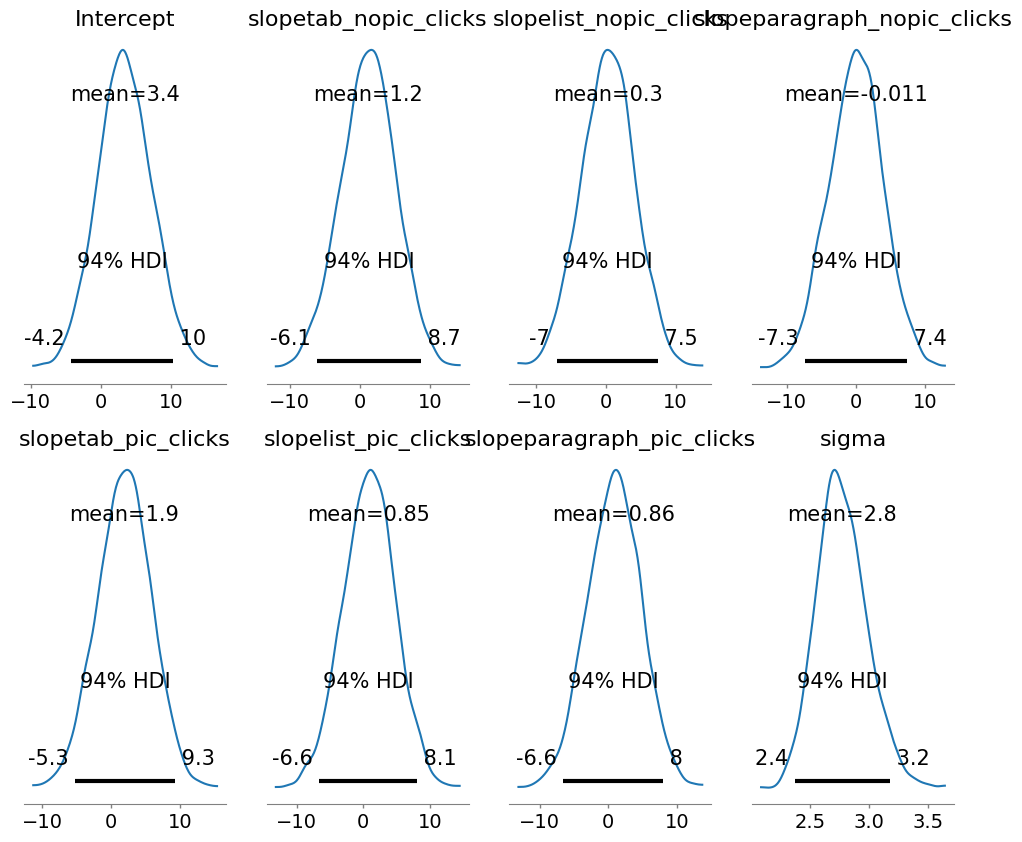

In [13]:
variables_to_plot = ['Intercept', 'slopetab_nopic_clicks', 'slopelist_nopic_clicks',
                     'slopeparagraph_nopic_clicks', 'slopetab_pic_clicks',
                     'slopelist_pic_clicks', 'slopeparagraph_pic_clicks', 'sigma']

pm.plot_posterior(linear_trace, var_names=variables_to_plot, figsize=(12, 10))

In [ ]:
# y = 3.4 + xi * 1.2 + xi * 0.3 + xi * (-0.011) + xi * 1.9 + xi * 0.85 + xi * 0.86

In [14]:
import itertools

In [38]:
digits = [0, 1]
coefficients = [1.2, 0.3, -0.011, 1.9, 0.85, 0.86]
combinations = list(itertools.product(digits, repeat=6))

In [39]:
combinations

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1, 0),
 (0, 0, 0, 1, 1, 1),
 (0, 0, 1, 0, 0, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 1, 0, 0),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 1, 0),
 (0, 0, 1, 1, 1, 1),
 (0, 1, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 1),
 (0, 1, 0, 0, 1, 0),
 (0, 1, 0, 0, 1, 1),
 (0, 1, 0, 1, 0, 0),
 (0, 1, 0, 1, 0, 1),
 (0, 1, 0, 1, 1, 0),
 (0, 1, 0, 1, 1, 1),
 (0, 1, 1, 0, 0, 0),
 (0, 1, 1, 0, 0, 1),
 (0, 1, 1, 0, 1, 0),
 (0, 1, 1, 0, 1, 1),
 (0, 1, 1, 1, 0, 0),
 (0, 1, 1, 1, 0, 1),
 (0, 1, 1, 1, 1, 0),
 (0, 1, 1, 1, 1, 1),
 (1, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 0, 1),
 (1, 0, 0, 0, 1, 0),
 (1, 0, 0, 0, 1, 1),
 (1, 0, 0, 1, 0, 0),
 (1, 0, 0, 1, 0, 1),
 (1, 0, 0, 1, 1, 0),
 (1, 0, 0, 1, 1, 1),
 (1, 0, 1, 0, 0, 0),
 (1, 0, 1, 0, 0, 1),
 (1, 0, 1, 0, 1, 0),
 (1, 0, 1, 0, 1, 1),
 (1, 0, 1, 1, 0, 0),
 (1, 0, 1, 1, 0, 1),
 (1, 0, 1, 1, 1, 0),
 (1, 0, 1, 1,

In [40]:
def calculate_y(combination):
    y = 3.4
    for digit, coeff in zip(combination, coefficients):
        y += int(digit) * coeff
    return y

In [41]:
y_values = [calculate_y(combination) for combination in combinations]

In [42]:
y_values

[3.4,
 4.26,
 4.25,
 5.11,
 5.3,
 6.16,
 6.1499999999999995,
 7.01,
 3.389,
 4.249,
 4.239,
 5.099,
 5.289,
 6.149,
 6.138999999999999,
 6.999,
 3.6999999999999997,
 4.56,
 4.55,
 5.41,
 5.6,
 6.46,
 6.449999999999999,
 7.31,
 3.6889999999999996,
 4.5489999999999995,
 4.539,
 5.399,
 5.5889999999999995,
 6.449,
 6.438999999999999,
 7.2989999999999995,
 4.6,
 5.46,
 5.449999999999999,
 6.31,
 6.5,
 7.36,
 7.35,
 8.209999999999999,
 4.5889999999999995,
 5.449,
 5.438999999999999,
 6.2989999999999995,
 6.488999999999999,
 7.348999999999999,
 7.338999999999999,
 8.198999999999998,
 4.8999999999999995,
 5.76,
 5.749999999999999,
 6.609999999999999,
 6.799999999999999,
 7.659999999999999,
 7.649999999999999,
 8.509999999999998,
 4.888999999999999,
 5.749,
 5.738999999999999,
 6.598999999999999,
 6.789,
 7.649,
 7.638999999999999,
 8.498999999999999]

In [43]:
variables = ['slopetab_nopic_clicks', 'slopelist_nopic_clicks', 'slopeparagraph_nopic_clicks', 
             'slopetab_pic_clicks', 'slopelist_pic_clicks', 'slopeparagraph_pic_clicks']

In [49]:
values_df = pd.DataFrame(combinations, columns=variables)
values_df['Concatenated_Variables'] = values_df.apply(lambda row: ''.join(row.astype(str)), axis=1)
values_df['y_values'] = y_values

In [50]:
values_df

,slopetab_nopic_clicks,slopelist_nopic_clicks,slopeparagraph_nopic_clicks,slopetab_pic_clicks,slopelist_pic_clicks,slopeparagraph_pic_clicks,Concatenated_Variables,y_values
0,0,0,0,0,0,0,000000,3.400
1,0,0,0,0,0,1,000001,4.260
2,0,0,0,0,1,0,000010,4.250
3,0,0,0,0,1,1,000011,5.110
4,0,0,0,1,0,0,000100,5.300
...,...,...,...,...,...,...,...,...
59,1,1,1,0,1,1,111011,6.599
60,1,1,1,1,0,0,111100,6.789
61,1,1,1,1,0,1,111101,7.649
62,1,1,1,1,1,0,111110,7.639


In [53]:
import matplotlib.pyplot as plt

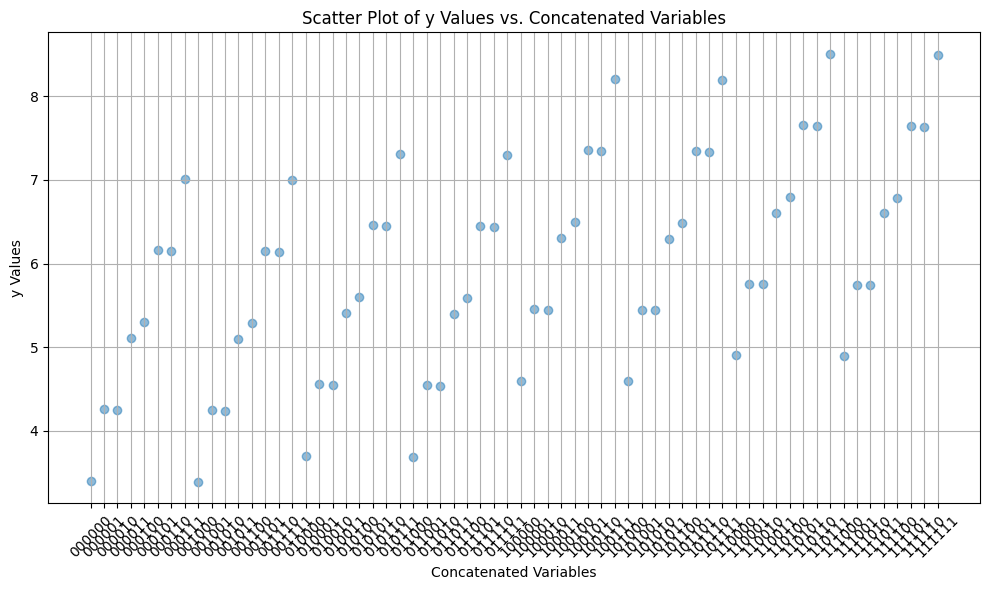

In [54]:
# Scatter plot of y values vs. concatenated variables
plt.figure(figsize=(10, 6))
plt.scatter(values_df['Concatenated_Variables'], values_df['y_values'], alpha=0.5)
plt.xlabel('Concatenated Variables')
plt.ylabel('y Values')
plt.title('Scatter Plot of y Values vs. Concatenated Variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


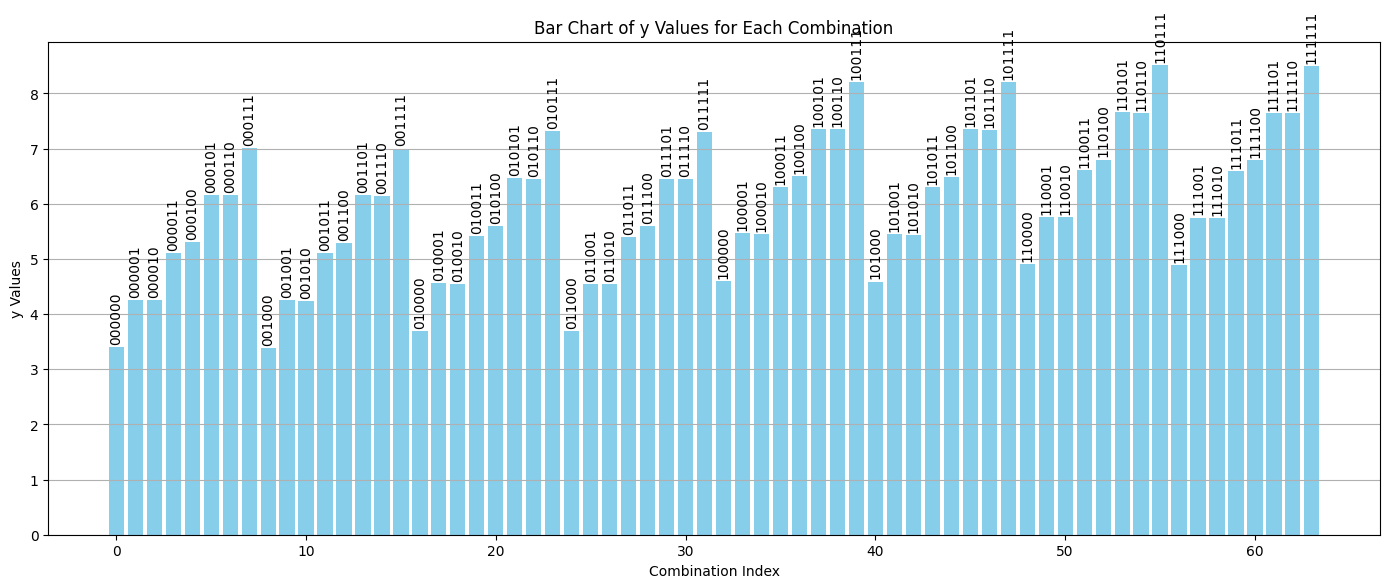

In [55]:
# Sort the DataFrame by concatenated variables
sorted_df = values_df.sort_values(by='Concatenated_Variables')

# Bar chart of y values for each combination with annotations
plt.figure(figsize=(14, 6))
bars = plt.bar(sorted_df.index, sorted_df['y_values'], color='skyblue')

# Annotate each bar with its concatenated variables
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05, 
             sorted_df['Concatenated_Variables'].iloc[i], 
             ha='center', va='bottom', rotation=90)

plt.xlabel('Combination Index')
plt.ylabel('y Values')
plt.title('Bar Chart of y Values for Each Combination')
plt.grid(axis='y')
plt.tight_layout()
plt.show()